# A/B Testing: Mobile Games Cookie Cats 

by **Muhammad Hilman Maulana** | last_update: July 2022

### Our Understanding

Marketing campaign penting dilakukan untuk mencapai tujuan bisnis. Marketing campaign dapat dilakukan melalui berbagai media, seperti misalnya emails, printed advertising, iklan TV dan radio, dan juga media sosial [(source)](https://blog.hubspot.com/marketing/marketing-campaigns). Pada saat ingin menjalankan marketing campaign, terlepas akan berjalan baik atau tidak, pasti akan ada dugaan seperti "ide atau strategi manakah yang akan berjalan baik?". Pun, tidak dapat dipungkiri, akan ada kekurangan resources, tools, atau mungkin motivasi untuk mengetes apakah ide/strategi yang telah kita siapkan akan berjalan sukses atau tidak. Oleh karena itu, hal ini yang membuat risky atau mungkin juga costly pada saat membuat strategi-strategi marketing campaign yang baru. 

A/B Testing memainkan peran yang begitu penting dalam hal pengambilan keputusan bisnis. A/B Testing sebetulnya merupakan suatu metode untuk membandingkan serta mengetes efektivitas dan juga benefits dari dua strategi bisnis yang berbeda. A/B Testing dapat juga diterjemahkan sebagai eksperimen dimana dua atau lebih strategi bisnis dijalankan dalam periode waktu tertentu kemudian hasil eksperimen tersebut dievaluasi untuk melihat strategi manakah yang berjalan paling baik (Hwang Yuun, 2019). 

Sebagai contoh, misalkan goal kita adalah untuk meningkatkan open rate pada email marketing. Jika hipotesis kita adalah email dengan subject B akan menghasilkan nilai open rate yang maksimal dibandingkan dengan sebject email A, maka sebaiknya dilakukan A/B Testing untuk kedua subject email tersebut. Sederhananya, kita pilih secara acak sebagian pengguna yang akan dikirim email marketing dengan subject email A, kemudian hal yang sama untuk sebagian pengguna lain namun dengan subject email B. Test ini dilakukan dalam kurun periode waktu yang telah ditentukan (misal: satu minggu, dua minggu, satu bulan, dst). Setelah test dijalankan, kemudian kita menganalisis serta mengevaluasi hasil eksperimen apakah terdapat perbedaan yang signifikan diantara dua versi subject email tersebut. Dari hasil ini, kita dapat menentukan strategi marketing manakah (pemilihan subject email) yang bekerja paling baik diantara beberapa stratrgi lain (Hwang Yuun, 2019).

Namun A/B Testing kali ini tidak dilakukan pada data campaign marketing melainkan pada data mobile games: Cookie Cats. Cookie Cats merupakan salah satu puzzle games populer yang dikembangkan oleh Actile Entertainment. Dalam permainan ini, pemain akan menemui semacam "gate" yang mengharuskan pemain menunggu beberapa saat sebelum akhirnya memulai games. Pada project ini, akan dilakukan A/B Testing pada dua gate, yaitu gate_30 dan gate_40 untuk melihat bagaimana pengaruhnya terhadap sum_gamerounds pemain tersebut.

### Data Source

Data yang digunakan dapat diakses melalui [Mobile Games A/B Testing](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) yang terdiri dari lima kolom, yaitu `'userid'`, `'version'`, `'sumgamerounds'`, `'retention_1'`, dan `'retention_7'`. Deskripsi lengkap terkait masing-masing kolom pada dataset tersebut dirangkum sbb.
- userid: A unique number that identifies each player.
- version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
- sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.
- retention_1: Did the player come back and play 1 day after installing?.
- retention_7: Did the player come back and play 7 days after installing?.

### Reference

Hwang, Y. H. (2019). Hands-On Data Science for Marketing. Birmingham: Packt Publishing Ltd.

### Data Cleaning & Overview

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Dataset/cookie_cats.csv")

In [5]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
data.shape

(90189, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
data.duplicated().any()

False

In [9]:
data.isnull().sum()/data.shape[0]*100

userid            0.0
version           0.0
sum_gamerounds    0.0
retention_1       0.0
retention_7       0.0
dtype: float64

#### Key Takeaways
- Data original terdiri dari 90189 baris dan 5 kolom.
- Tidak terdapat duplikat data.
- Tidak terdapat missing value.


### Data Analysis

In [19]:
pd.DataFrame(data["sum_gamerounds"].describe())

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


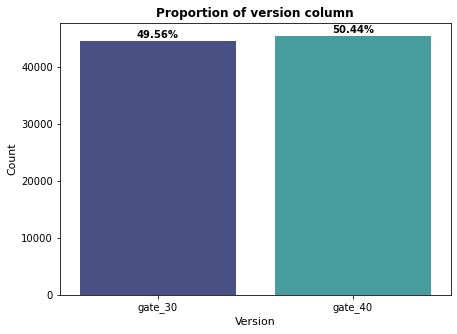

In [11]:
plt.figure(figsize=(7,5)) 
plt.title("Proportion of version column", fontsize = 12,fontweight="bold")
ax=sns.countplot(data["version"], palette="mako")
plt.xlabel("Version", fontsize = 11)
plt.ylabel("Count", fontsize = 11)
total=len(data)
for p in ax.patches:
        ax.annotate(f'{100 * p.get_height() / total:.2f}%\n', (p.get_x() + p.get_width() / 2,p.get_height()),ha='center', va='center',weight='bold')

In [12]:
data['retention_1_num'] = data['retention_1'].apply(lambda x: 0 if x == False else 1)

In [13]:
data['retention_7_num'] = data['retention_7'].apply(lambda x: 0 if x == False else 1)

In [14]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1_num,retention_7_num
0,116,gate_30,3,False,False,0,0
1,337,gate_30,38,True,False,1,0
2,377,gate_40,165,True,False,1,0
3,483,gate_40,1,False,False,0,0
4,488,gate_40,179,True,True,1,1


Text(0.5, 1.0, 'Boxplot Kolom ')

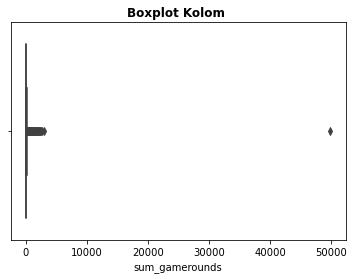

In [47]:
plt.figure(figsize=(7,5)) 
plt.title("Percentage of Stroke Status (1 Yes, 0 No)", fontsize = 12,fontweight="bold")
sns.boxplot(data["sum_gamerounds"], palette="mako").set_title("Boxplot Kolom ",weight='bold')        

In [16]:
data[data["sum_gamerounds"]>40000]

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1_num,retention_7_num
57702,6390605,gate_30,49854,False,True,0,1


In [17]:
data_drop = data.drop(labels=57702, axis=0)

Text(0.5, 1.0, 'Boxplot sum_gamerounds ')

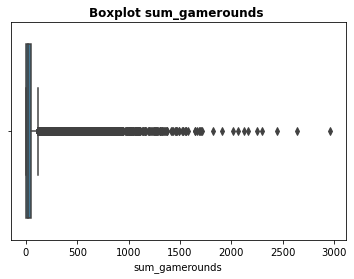

In [18]:
plt.figure(figsize=(7,5)) 
plt.title("Percentage of Stroke Status (1 Yes, 0 No)", fontsize = 12,fontweight="bold")
sns.boxplot(data_drop["sum_gamerounds"], palette="mako").set_title("Boxplot sum_gamerounds ",weight='bold')    

In [36]:
IQR = 51 - 5
upp = 51+((IQR)*1.5)

In [39]:
data_no_outliers = data.loc[data["sum_gamerounds"] <  upp ]

Text(0.5, 1.0, 'Boxplot sum_gamerounds ')

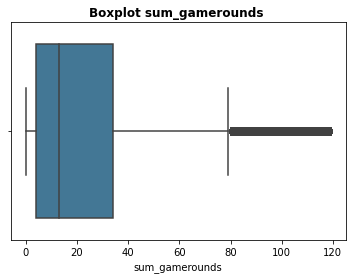

In [40]:
plt.figure(figsize=(7,5)) 
plt.title("Percentage of Stroke Status (1 Yes, 0 No)", fontsize = 12,fontweight="bold")
sns.boxplot(data_no_outliers["sum_gamerounds"], palette="mako").set_title("Boxplot sum_gamerounds ",weight='bold')  

In [22]:
data.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17,52.456264,256.716423,49854
gate_40,45489,16,51.298776,103.294416,2640


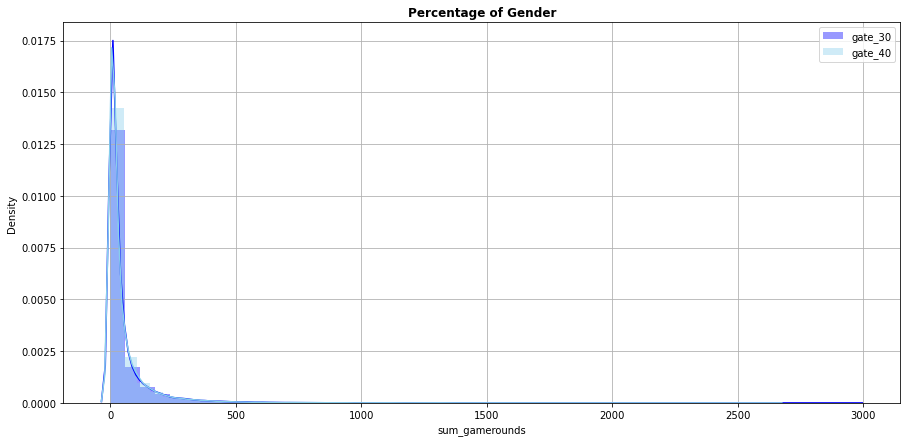

In [61]:
sns.set_palette("Blues")
plt.figure(figsize=(15,7))
ax = sns.distplot(data_drop[data_drop["version"]=="gate_30"]["sum_gamerounds"], label="gate_30",color='blue')
ax = sns.distplot(data_drop[data_drop["version"]=="gate_40"]["sum_gamerounds"], label= "gate_40",color='skyblue')
ax.set_title('Percentage of Gender',fontweight="bold")
plt.grid()
plt.legend()

In [59]:
ret1 = data.groupby(by='version')['retention_1_num'].sum() / data.groupby(
    by='version')['retention_1_num'].count() * 100.0

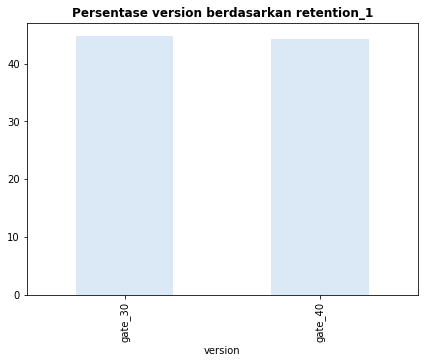

In [62]:
plt.figure(figsize=(7,5)) 
plt.title("Persentase version berdasarkan retention_1", fontsize = 12,fontweight="bold")
ax=ret1.plot(kind="bar")

In [65]:
rat2 = data.groupby(by='version')['retention_7_num'].sum() / data.groupby(
    by='version')['retention_7_num'].count() * 100.0

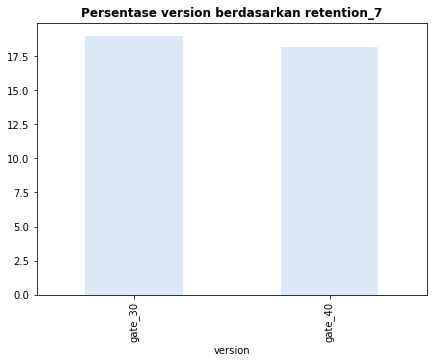

In [66]:
plt.figure(figsize=(7,5)) 
plt.title("Persentase version berdasarkan retention_7", fontsize = 12,fontweight="bold")
ax=rat2.plot(kind="bar")

### Perform A/B Testing

Akan dilihat apakah gate_30 dan gate_40 memberikan hasil yang berbeda atau tidak pada banyaknya game rounds yang dimainkan

In [67]:
import numpy as np
from scipy import stats

#### Using Manual Equations

In [68]:
rataan = data.groupby('version').mean()['sum_gamerounds']
rataan

version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

In [69]:
std = data.groupby('version').std()['sum_gamerounds']
std

version
gate_30    256.716423
gate_40    103.294416
Name: sum_gamerounds, dtype: float64

In [71]:
cnt = data.groupby('version').count()['sum_gamerounds']
cnt

version
gate_30    44700
gate_40    45489
Name: sum_gamerounds, dtype: int64

In [73]:
t_hitung = (
    rataan.iloc[0] - rataan.iloc[1]
)/ np.sqrt(
    (std.iloc[0]**2/cnt.iloc[0]) + (std.iloc[1]**2/cnt.iloc[1])
)

df = cnt.iloc[0] + cnt.iloc[1] - 2

p_value = (1 - stats.t.cdf(t_hitung, df=df))*2

In [75]:
t_hitung

0.8854374331270669

In [76]:
p_value

0.37592311132601663

#### Using Package Spicy

In [77]:
t, p = stats.ttest_ind(
    data.loc[data['version'] == "gate_30", 'sum_gamerounds'].values, 
    data.loc[data['version'] == "gate_40", 'sum_gamerounds'].values, 
    equal_var=False
)

In [79]:
t

0.8854374331270672

In [80]:
p

0.37592438409326223

### Kesimpulan

Perhatikan bahwa nilai p_value = 0.376, baik menggunakan cara manual maupun package, sangatlah kecil jika dibandingkan dengan nilai level of significance (alpha = 0.05). Artinya, hipotesis null tidak ditolak, tidak ada perbedaan yang signifikan pada kedua kelompok version tersebut. Jika dilihat hasil visualisasi pun, baik gate_30 maupun gate_40 tidak terdapat perbedaan yang berarti pada kedua kelompok tersebut.